## Check simulations of BDs

In [2]:
import sys
sys.path.append("../python/")
#sys.path.append("../python/cluster")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.palettes
import imp
from matplotlib.offsetbox import AnchoredText
import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population, spatial_sampling, rho, IMF_sampling
from astropy.constants import R_jup, M_jup, M_sun, L_sun
from scipy.interpolate import interp1d, interp2d
from utils import temperature, heat, temperature_withDM

from matplotlib import rc
rc('font', family='times new roman', size=22.)

### Empirical space densities at the Solar neighbourhood

Data below is taken from Table 15 of [Kirkpatrick + '20](https://arxiv.org/abs/2011.11616)

In [3]:
# temperature [K]
bin_edges = [300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250] 
# space density [x 1e-3 pc-3]
rho       = [2.84, 4.24, 2.80, 1.99, 1.72, 1.11, 1.95, 0.94, 0.81, 0.78, 0.50, 0.72, 0.31] 
error_rho = [np.nan, 0.70, 0.37, 0.32, 0.30, 0.25, 0.30, 0.22, 0.20, 0.20, 0.17, 0.18, np.nan]

bins = np.zeros(len(rho))

for i in range(len(rho)):
    bins[i] = 0.5*(bin_edges[i] + bin_edges[i+1])

#TODO - need to plot arrows for lower limits

Text(0.5, 0, '$T_{\\rm eff}$ [K]')

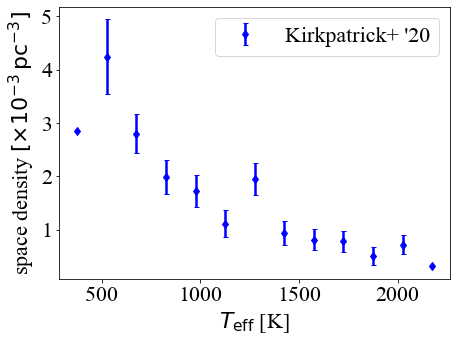

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.errorbar(bins, rho, error_rho, fmt="d", elinewidth=2.5, capsize=2.5, label="Kirkpatrick+ '20", color="blue")

ax.legend()
ax.set_ylabel(r"space density $\rm [\times 10^{-3}\,pc^{-3}]$")
ax.set_xlabel(r"$T_{\rm eff}$ [K]")

### Spatial distribution

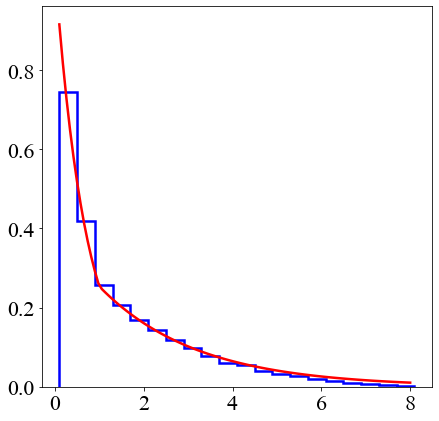

In [31]:
# Checking sampling results

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)


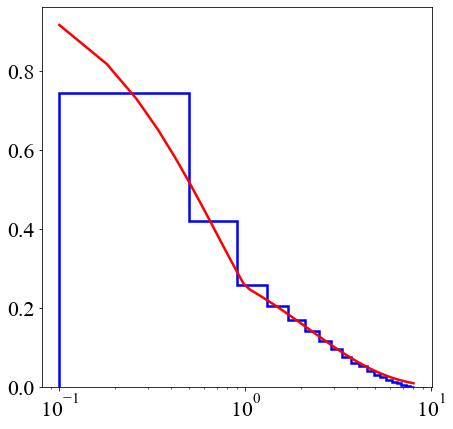

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 8., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 8.178, args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)

_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)

ax.set_xscale("log")

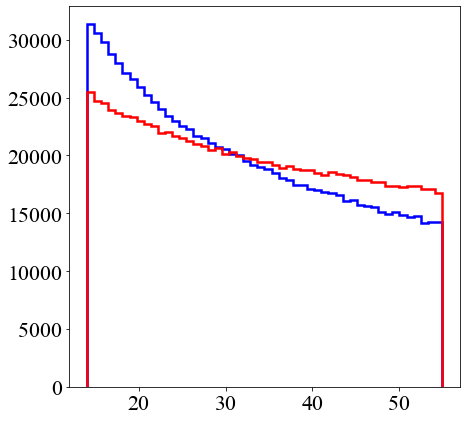

In [14]:
from utils import random_powerlaw

N = 1000000
mass1 = random_powerlaw(-0.6, N, Mmin=14, Mmax=55)
mass2 = random_powerlaw(-0.3, N, Mmin=14, Mmax=55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
_, _, _ = ax.hist(mass1, color="blue", histtype="step", bins=50, linewidth=2.5)
_, _, _ = ax.hist(mass2, histtype="step", color="red", bins=50, linewidth=2.5)

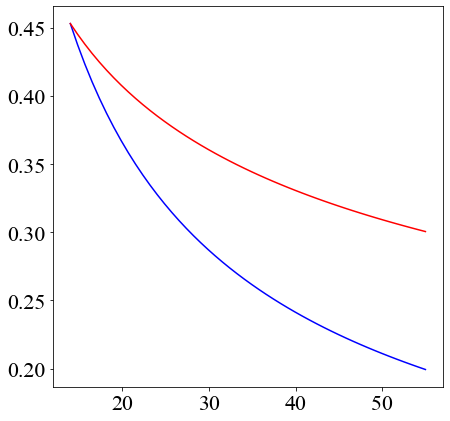

In [11]:
def IMF(M, alpha):
    return np.power(M, -alpha)

M = np.linspace(14, 55)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(M, IMF(14, 0.3)/IMF(14, 0.6)*IMF(M, 0.6), color="blue")
ax.plot(M, IMF(M, 0.3), color="red")

## Noise in mass estimate

In [15]:
import sys
sys.path.append("../python/")
import imp

import mock_generation
imp.reload(mock_generation)
from mock_generation import mock_population
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mock_population?

In [11]:
_, _, mass1, mass_wn1, _ = mock_population(1000, 0.1, 0.1, 1., 1., 5.)
_, _, mass2, mass_wn2, _ = mock_population(1000, 0.1, 0.2, 1., 1., 5.)

In [14]:
print(np.sum(np.abs(mass_wn1 - mass1)/mass1)/1000*100)
print(np.sum(np.abs(mass_wn2 - mass2)/mass2)/1000*100)

7.872992834442383
15.97226555827462


Text(0.5, 0, '$\\sigma_M$')

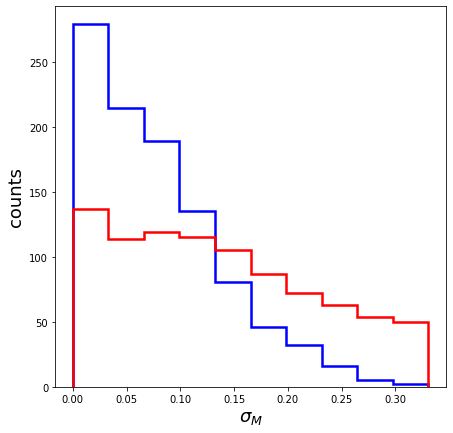

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

counts1, bins, _ = ax.hist(np.abs(mass_wn1 - mass1)/mass1, histtype="step", color="b", lw=2.5)
counts2, _, _    = ax.hist(np.abs(mass_wn2 - mass2)/mass2, histtype="step", color="r", lw=2.5, bins=bins)

ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

Text(0.5, 0, '$\\sigma_M$')

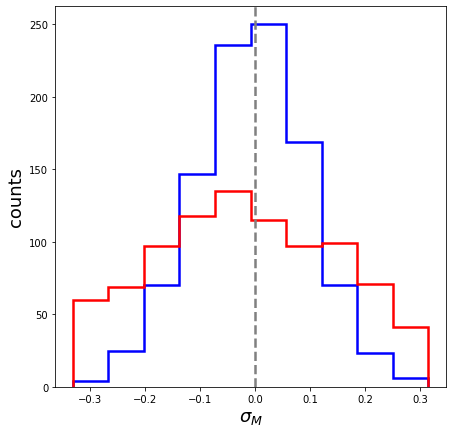

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

counts1, bins, _ = ax.hist((mass_wn1 - mass1)/mass1, histtype="step", color="b", lw=2.5)
counts2, _, _    = ax.hist((mass_wn2 - mass2)/mass2, histtype="step", color="r", lw=2.5, bins=bins)
ax.axvline(0., ls="--", color="grey", lw=2.5)
ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

Text(0.5, 0, '$\\sigma_M$')

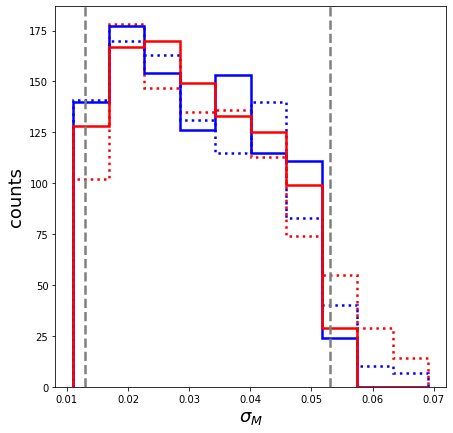

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

_, bins, _ = ax.hist(mass1, histtype="step", color="b", ls=":", lw=2.5)
_, _, _    = ax.hist(mass2, histtype="step", color="r", ls=":", lw=2.5, bins=bins)
counts1, _, _ = ax.hist(mass_wn1, histtype="step", color="b", lw=2.5, bins=bins)
counts2, _, _    = ax.hist(mass_wn2, histtype="step", color="r", lw=2.5, bins=bins)
ax.axvline(0.013, ls="--", color="grey", lw=2.5)
ax.axvline(0.053, ls="--", color="grey", lw=2.5)

ax.set_ylabel("counts", fontsize=18)
ax.set_xlabel(r"$\sigma_M$", fontsize=18)

## DM velocity dispersion

In [2]:
from scipy.special import hyp2f1
from scipy.interpolate import interp1d

def vgNFW(Rsun, R, parameters):
    """
    Rotation velocity for gNFW dark matter density profile
    """
    # gNFW parameters
    gamma = parameters[0]
    Rs    = parameters[1]
    rho0  = parameters[2]
    v     = [];
    for Rint in R:
        hyp=np.float(hyp2f1(3-gamma,3-gamma,4-gamma,-Rint/Rs))
        Integral=(-2**(2+3*gamma)*np.pi*Rint**(3-gamma)*(1+
                  Rsun*(1./Rs))**(3-gamma)*rho0*hyp)/(-3+gamma)
        v.append(np.sqrt(1.18997*10.**(-31.)*Integral/Rint)*3.08567758*10.**(16.))
    v = np.array(v,dtype=np.float64)
    # Return
    return v

def vc(Rsun, Rint, parameters, filepath):
    data = np.genfromtxt(filepath + "rc_e2bulge_R08.178_J_corr.dat", unpack=True)
    r = data[0]
    vB = data[1]
    data = np.genfromtxt(filepath + "rc_hgdisc_R08.178_corr.dat", unpack=True)
    vD = data[1]
    vDM = vgNFW(Rsun, r, parameters)
    vtot = np.sqrt(np.power(vB, 2) + np.power(vD, 2)+ np.power(vDM, 2))
    vtot_intp = interp1d(r, vtot)
    return vtot_intp(Rint)

In [5]:
R0 = 8.178
r  = np.linspace(0.1, R0, 500)
parameters = [1., 20., 0.42]
filepath = "/home/mariacst/cluster/data/"

rc = vc(R0, r, parameters, filepath)

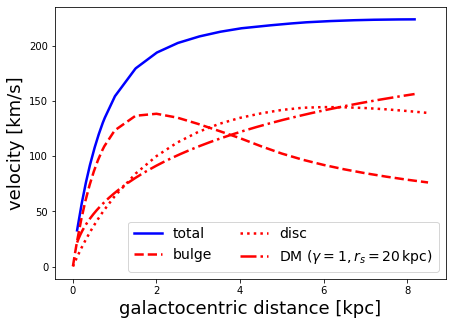

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(r, rc, ls="-", lw=2.5, color="blue", label="total")

data = np.genfromtxt(filepath + "rc_e2bulge_R08.178_J_corr.dat", unpack=True)
ax.plot(data[0], data[1], ls="--", color="red", label="bulge", lw=2.5)
data = np.genfromtxt(filepath + "rc_hgdisc_R08.178_corr.dat", unpack=True)
ax.plot(data[0], data[1], ls=":", color="red", label="disc", lw=2.5)
ax.plot(r, vgNFW(R0, r, parameters), ls="-.", color="red", label=r"DM $(\gamma=1, r_s=20\,{\rm kpc})$", lw=2.5)

ax.legend(loc=4, ncol=2, fontsize=14)
ax.set_ylabel("velocity [km/s]", fontsize=18)
ax.set_xlabel("galactocentric distance [kpc]", fontsize=18)
fig.savefig("../../Figs/rc.pdf", bbox_inches="tight")

## GC sampling - test 

In [6]:
def rho_bulge(r, phi, theta, R0=8.178, x0=0.899, y0=0.386, z0=0.250, 
              alpha=0.415):
    """
    Density profile for Stanek + '97 (E2) bulge [arbitrary units]
    (all spatial coordiantes are given in kpc)
    """
    x0 = x0*R0/8. # rescale to adopted R0 value
    y0 = y0*R0/8. 
    # return
    return (np.exp(-np.sqrt(np.sin(theta)**2*((np.cos(phi+alpha)/x0)**2 +
                            (np.sin(phi+alpha)/y0)**2) + 
                            (np.cos(theta)/z0)**2)*r))

def rho_disc(r, theta, R0=8.178, Rd=2.15, zh=0.40):
    """
    Density profile for Bovy and Rix disc [arbitrary units]
    (all spatial coordiantes are given in kpc)
    """
    Rd = Rd*R0/8. # rescale to adopted R0 value
    # return
    return np.exp(-r*np.sin(theta)/Rd)*np.exp(-r*np.cos(theta)/zh)


def rho(r, phi, theta, R0=8.178):
    """
    Density profile [arbitrary units]
    """
    # continuity condition at r = 1 kpc
    C    = rho_disc(1., theta, R0)/rho_bulge(1., phi, theta, R0)
    _rho = C*rho_bulge(r, phi, theta, R0)
    # return
    return (np.heaviside(1.-r, 1.)*_rho +
            np.heaviside(r-1., 0.)*rho_disc(r, theta, R0))

def spatial_sampling(nBDs, phi=0., theta=np.pi/2., R0=8.178):
    """
    Sampling nBDs points from density profile rho using Von Neumann 
    acceptance-rejection technique
    """
    ymin = 0.1; ymax = 1.0
    umin = np.min([rho(ymin, phi, theta), rho(1., phi, theta),
                   rho(R0, phi, theta)])
    umax = np.max([rho(ymin, phi, theta), rho(1., phi, theta),
                   rho(R0, phi, theta)])

    i = 0
    r = np.ones(nBDs)*100
    while i<nBDs:
        yi = np.random.uniform(ymin, ymax)
        ui = np.random.uniform(umin, umax)
        if ui < rho(yi, phi, theta, R0):
            r[i] = yi
            i+=1
        else:
            continue
    # return 
    return r

In [7]:
r0 = spatial_sampling(1000)

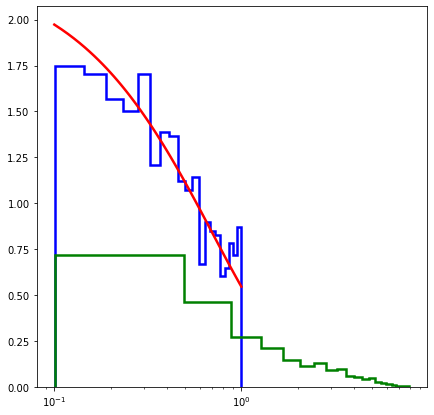

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

radius = np.linspace(0.1, 1., 100)
from scipy.integrate import quad
A = quad(rho, 0.1, 1., args=(0., np.pi/2., ))
ax.plot(radius, rho(radius, 0., np.pi/2.)/A[0], color="red", lw=2.5)
#r = spatial_sampling(1000)
_, _, _ = ax.hist(r, histtype="step", linewidth=2.5, color="blue", density=True, bins=20)
_, _, _ = ax.hist(r0, histtype="step", linewidth=2.5, color="g", density=True, bins=20)

ax.set_xscale("log")

# Update ATMO input files

In [ ]:
import glob

# load theoretical BD cooling model - ATMO 2020
path =  "/home/mariacst/cluster/data/"
#path = "/Users/mariabenito/Dropbox/exoplanets/DM/python/cluster/data/"
#path  = path 
M     = []
age   = {}
Teff  = {}
files = glob.glob(path + "*.txt")
for file in files:
    data = np.genfromtxt(file, unpack=True)
    age[data[0][0]]  = data[1] # age [Gyr]
    Teff[data[0][0]] = data[2] # Teff [K]
    M.append(data[0][0])

_age   = np.linspace(1, 10, 100)
_age_i = []; _mass = []; _teff = []
# the first 5 masses do not have all values between 1 and 10 Gyr
M = np.sort(M)[5:] # further remove larger masses
for m in M:
    Teff_interp = interp1d(age[m], Teff[m])
    for _a in _age:
        _age_i.append(_a)
        _mass.append(m)
        _teff.append(Teff_interp(_a))
points = np.transpose(np.asarray([_age_i, _mass]))
values = np.asarray(_teff)

print(points.shape)

_age_i = np.asarray(_age_i)
_mass  = np.asarray(_mass)
_teff  = np.asarray(_teff)

with open("ATMO_CEQ_vega_MIRI.txt", "w") as f:
    #f.write("#age[Gyr]  mass[]  T[K]")
    for a, m, T in zip(_age_i, _mass, _teff):
        f.write('%.6f %.6f %.6f\n' %(a, m, T))

# Limiting minimum temperature/dust obscuration

In [29]:
import numpy as np
from scipy.interpolate import interp1d, griddata
from astropy.constants import L_sun, R_jup, M_jup, M_sun
from utils import heat, temperature_withDM
import glob

def rho_bulge(r, phi, theta, R0=8.178, x0=0.899, y0=0.386, z0=0.250, 
              alpha=0.415):
    """
    Density profile for Stanek + '97 (E2) bulge [arbitrary units]
    (all spatial coordiantes are given in kpc)
    """
    x0 = x0*R0/8. # rescale to adopted R0 value
    y0 = y0*R0/8. 
    # return
    return (np.exp(-np.sqrt(np.sin(theta)**2*((np.cos(phi+alpha)/x0)**2 +
                            (np.sin(phi+alpha)/y0)**2) + 
                            (np.cos(theta)/z0)**2)*r))

def rho_disc(r, theta, R0=8.178, Rd=2.15, zh=0.40):
    """
    Density profile for Bovy and Rix disc [arbitrary units]
    (all spatial coordiantes are given in kpc)
    """
    Rd = Rd*R0/8. # rescale to adopted R0 value
    # return
    return np.exp(-r*np.sin(theta)/Rd)*np.exp(-r*np.cos(theta)/zh)


def rho(r, phi, theta, R0=8.178):
    """
    Density profile [arbitrary units]
    """
    # continuity condition at r = 1 kpc
    C    = rho_disc(1., theta, R0)/rho_bulge(1., phi, theta, R0)
    _rho = C*rho_bulge(r, phi, theta, R0)
    # return
    return (np.heaviside(1.-r, 1.)*_rho + 
            np.heaviside(r-1., 0.)*rho_disc(r, theta, R0))

def spatial_sampling(nBDs, phi=0., theta=np.pi/2., R0=8.178):
    """
    Sampling nBDs points from density profile rho using Von Neumann 
    acceptance-rejection technique
    """
    ymin = 0.1; ymax = 1.0#R0
    #print("maximimum observed GC distance = ", ymax)
    umin = np.min([rho(ymin, phi, theta), rho(1., phi, theta), 
                   rho(R0, phi, theta)])
    umax = np.max([rho(ymin, phi, theta), rho(1., phi, theta), 
                   rho(R0, phi, theta)])
    
    i = 0
    r = np.ones(nBDs)*100
    while i<nBDs:
        yi = np.random.uniform(ymin, ymax)
        ui = np.random.uniform(umin, umax)
        if ui < rho(yi, phi, theta, R0):
            r[i] = yi
            i+=1
        else:
            continue
    # return 
    return r

def IMF_sampling(alpha, size, Mmin=14, Mmax=55):
    """
    Sampling from power-law distribution
    """
    y = np.random.uniform(0, 1, size=size)
    return ((Mmax**(alpha+1) - Mmin**(alpha+1))*y + Mmin**(alpha+1))**(1./(alpha+1))

def mock_population(N, rel_unc_Tobs, rel_mass, f_true, gamma_true,
                    rs_true, rho0_true=0.42):
    """
    Generate N observed exoplanets

    Assumptions
    -----------
    1) N observed exoplanets distributed according to E2 bulge + BR disc
    2) (All) exoplanets radius = Rjup
    3) BD evolution model taken from ATMO 2020
    4) BDs have masses chosen between 14-55 Mjup assuming power-law IMF and
       unifrom age distribution between 1-10 Gyr
    5) Tobs has relative uncertainty rel_unc_Tobs
    6) Estimated masses have an uncertainty of rel_mass
    """
    #np.random.seed(42)
    _N = int(2*N)
    # galactocentric radius of simulated exoplanets
    r_obs = spatial_sampling(N)
    # Age
    ages = np.random.uniform(1., 10., N) # [yr] / [1-10 Gyr]
    # Mass
    mass = IMF_sampling(-0.6, _N, Mmin=6, Mmax=75) # [Mjup]
    mass = mass*M_jup.value/M_sun.value # [Msun]
    # add Gaussian noise
    mass_wn = mass + np.random.normal(loc=0, scale=(rel_mass*mass), size=_N)
    # select only those objects with masses between 14 and 55 Mjup
    pos  = np.where((mass_wn > 0.013) & (mass_wn < 0.053))

    mass     = mass[pos][:N]
    mass_wn  = mass_wn[pos][:N]
    
    # load theoretical BD cooling model - ATMO 2020
    path =  "/home/mariacst/cluster/data/"
    #path = "/Users/mariabenito/Dropbox/exoplanets/DM/python/cluster/data/"
    #path  = path 
    M     = []
    age   = {}
    Teff  = {}
    files = glob.glob(path + "*.txt")
    for file in files:
        data = np.genfromtxt(file, unpack=True)
        age[data[0][0]]  = data[1] # age [Gyr]
        Teff[data[0][0]] = data[2] # Teff [K]
        M.append(data[0][0])

    _age   = np.linspace(1, 10, 100)
    _age_i = []; _mass = []; _teff = []
    # the first 5 masses do not have all values between 1 and 10 Gyr
    M = np.sort(M)[5:] # further remove larger masses
    for m in M:
        Teff_interp = interp1d(age[m], Teff[m])
        for _a in _age:
            _age_i.append(_a)
            _mass.append(m)
            _teff.append(Teff_interp(_a))
    points = np.transpose(np.asarray([_age_i, _mass]))
    values = np.asarray(_teff)

    xi = np.transpose(np.asarray([ages, mass]))

    Teff     = griddata(points, values, xi)
    heat_int = heat(Teff, np.ones(len(Teff))*R_jup.value)
    #print(len(Teff), len(r_obs), len(heat_int), len(mass))
    # Observed velocity (internal heating + DM)
    Tobs = temperature_withDM(r_obs, heat_int, f=f_true, R=R_jup.value,
                           M=mass*M_sun.value,
                           parameters=[gamma_true, rs_true, rho0_true])
    # add Gaussian noise
    Tobs = Tobs + np.random.normal(loc=0, scale=(rel_unc_Tobs*Tobs), size=N)
    

    #m_obs = np.zeros(len(mass))
    #for i in range(len(mass)):
    #    m_obs[i] = mass[i] + np.random.normal(loc=0, scale=(0.2*mass[i]))
    #    if m_obs[i] > 0.053 or m_obs[i] < 0.013:
    #        while m_obs[i] > 0.053 or m_obs[i] < 0.013:
    #            m_obs[i] = mass[i] + np.random.normal(loc=0, scale=(0.2*mass[i]))

    #return
    return r_obs, Tobs, mass_wn, ages


def mock_population(N, rel_unc_Tobs, rel_mass, f_true, gamma_true,
                    rs_true, rho0_true=0.42):
    """
    Generate N observed exoplanets

    Assumptions
    -----------
    1) N observed exoplanets distributed according to E2 bulge + BR disc
    2) (All) exoplanets radius = Rjup
    3) BD evolution model taken from ATMO 2020
    4) BDs have masses chosen between 14-55 Mjup assuming power-law IMF and
       unifrom age distribution between 1-10 Gyr
    5) Tobs has relative uncertainty rel_unc_Tobs
    6) Estimated masses have an uncertainty of rel_mass
    """
    #np.random.seed(42)
    _N = int(2*N)
    # galactocentric radius of simulated exoplanets
    r_obs = spatial_sampling(N)
    # Age
    ages = np.random.uniform(1., 10., N) # [yr] / [1-10 Gyr]
    # Mass
    mass = IMF_sampling(-0.6, _N, Mmin=6, Mmax=75) # [Mjup]
    mass = mass*M_jup.value/M_sun.value # [Msun]
    # add Gaussian noise
    mass_wn = mass + np.random.normal(loc=0, scale=(rel_mass*mass), size=_N)
    # select only those objects with masses between 14 and 55 Mjup
    pos  = np.where((mass_wn > 0.013) & (mass_wn < 0.053))

    mass     = mass[pos][:N]
    mass_wn  = mass_wn[pos][:N]
    
    path =  "./data/"
    data = np.genfromtxt(path + "./ATMO_CEQ_vega_MIRI.txt", unpack=True)
    points = np.transpose(data[0:2, :])
    values = data[2]
    xi = np.transpose(np.asarray([ages, mass]))

    Teff     = griddata(points, values, xi)
    heat_int = heat(Teff, np.ones(len(Teff))*R_jup.value)
    #print(len(Teff), len(r_obs), len(heat_int), len(mass))
    # Observed velocity (internal heating + DM)
    Tobs = temperature_withDM(r_obs, heat_int, f=f_true, R=R_jup.value,
                           M=mass*M_sun.value,
                           parameters=[gamma_true, rs_true, rho0_true])
    # add Gaussian noise
    Tobs = Tobs + np.random.normal(loc=0, scale=(rel_unc_Tobs*Tobs), size=N)
    

    #m_obs = np.zeros(len(mass))
    #for i in range(len(mass)):
    #    m_obs[i] = mass[i] + np.random.normal(loc=0, scale=(0.2*mass[i]))
    #    if m_obs[i] > 0.053 or m_obs[i] < 0.013:
    #        while m_obs[i] > 0.053 or m_obs[i] < 0.013:
    #            m_obs[i] = mass[i] + np.random.normal(loc=0, scale=(0.2*mass[i]))

    #return
    return r_obs, Tobs, mass_wn, ages

In [31]:
N=1000; relT=0.1; relM=0.1; f=1; g=0.5; rs=10.
i=286
np.random.seed(42)
r1, T1, m1, a1 = mock_population(N, relT, relM, f, g, rs)
print(r1[i], T1[i], m1[i], a1[i])

np.random.seed(42)
r2, T2, m2, a2 = mock_population_up(N, relT, relM, f, g, rs)
print(r2[i], T2[i], m2[i], a2[i])

0.2666196359547577 424.8339771399571 0.021938038761292095 7.8155468044795064
0.2666196359547577 424.8339794101862 0.021938038761292095 7.8155468044795064


(7100, 2)


In [22]:
data = np.genfromtxt("./ATMO_CEQ_vega_MIRI.txt", unpack=True)

points = np.transpose(data[0:2, :])
print(points.shape)

(7100, 2)


In [18]:
points

array([[1.090909e+00, 1.181818e+00, 1.272727e+00, ..., 9.818182e+00,
        9.909091e+00, 1.000000e+01],
       [5.000000e-03, 5.000000e-03, 5.000000e-03, ..., 7.500000e-02,
        7.500000e-02, 7.500000e-02]])